# **Red Neuronal Manual**

## **Librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_gaussian_quantiles

## **Datos**

In [3]:
gaussian_quantiles = make_gaussian_quantiles(
    mean=None, 
    cov=0.1,
    n_samples=1000,
    n_features=2,
    n_classes=2,
    shuffle=True,
    random_state=None  
)

In [4]:
X, y = gaussian_quantiles

In [5]:
y = y[:, np.newaxis]

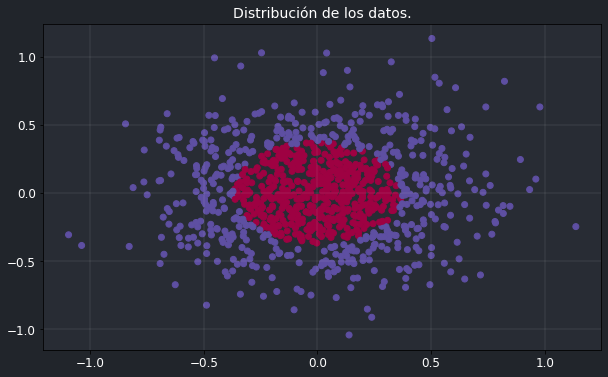

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.title('Distribución de los datos.', size=14, color='white')
plt.grid(visible=True, linewidth=0.1, color='white')

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.scatter(X[:,0], X[:,1], c=y[:,0], cmap=plt.cm.Spectral)

plt.xticks(color='white', size=12)
plt.yticks(color='white', size=12)

plt.show()

## **Modelo**

### **Funciones de activación**

In [7]:
def sigmoide(x, derivate = False):
    if derivate:
        return np.exp(-x)/((np.exp(-x)+1)**2)
    else:
        return 1 / (1 + np.exp(-x))

def relu(x, derivate=False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:
        return np.maximum(0, x)

### **Función de Perdida**

In [8]:
def mse(y_real, y_pred, derivate=False):
    if derivate==True:
        return (y_pred - y_real)
    else:
        return np.mean((y_pred - y_real)**2)

### **Estructura de la Red Neuronal**

In [18]:
def inicializar_parametros(layers_dim):
    parametros = {}
    longitud = len(layers_dim)
  
    for i in range(0, longitud - 1):
        parametros[f'W{str(i + 1)}'] = (np.random.rand(layers_dim[i], layers_dim[i + 1]) * 2) - 1
        parametros[f'b{str(i + 1)}'] = (np.random.rand(1, layers_dim[i + 1]) * 2) - 1
  
    return parametros

#### **Función de entrenamiento**

In [36]:
def train_network(X_data, learning_rate, parametros, training=True):
    # RED NEURONAL
    parametros['A0'] = X_data

    # Capa Oculta 1
    parametros['Z1'] = np.matmul(parametros['A0'], parametros['W1']) + parametros['b1']
    # Función de activación
    parametros['A1'] = relu(parametros['Z1'])

    # Capa Oculta 2
    parametros['Z2'] = np.matmul(parametros['A1'], parametros['W2']) + parametros['b2']
    # Función de activación
    parametros['A2'] = relu(parametros['Z2'])

    # Capa Oculta 3
    parametros['Z3'] = np.matmul(parametros['A2'], parametros['W3']) + parametros['b3']
    # Función de activación
    parametros['A3'] = sigmoide(parametros['Z3'])

    output = parametros['A3']

    if training:
        # BACKPROPAGATION
        parametros['dZ3'] = mse(y, output, derivate=True) * sigmoide(parametros['A3'], True)
        parametros['dw3'] = np.matmul(parametros['A2'].T, parametros['dZ3'])

        parametros['dZ2'] = np.matmul(parametros['dZ3'], parametros['W3'].T) * relu(parametros['A2'], derivate=True)
        parametros['dw2'] = np.matmul(parametros['A1'].T, parametros['dZ2'])

        parametros['dZ1'] = np.matmul(parametros['dZ2'], parametros['W2'].T) * relu(parametros['A1'], derivate=True)
        parametros['dw1'] = np.matmul(parametros['A0'].T, parametros['dZ1'])

        # DESCENSO DEL GRADIENTE
        parametros['W3'] = parametros['W3'] - parametros['dw3'] * learning_rate
        parametros['b3'] = parametros['b3'] - (np.mean(parametros['dw3'], axis=0, keepdims=True)) * learning_rate

        parametros['W2'] = parametros['W2'] - parametros['dw2'] * learning_rate
        parametros['b2'] = parametros['b2'] - (np.mean(parametros['dw2'], axis=0, keepdims=True)) * learning_rate

        parametros['W1'] = parametros['W1'] - parametros['dw1'] * learning_rate
        parametros['b1'] = parametros['b1'] - (np.mean(parametros['dw1'], axis=0, keepdims=True)) * learning_rate

    return output

In [56]:
layer_dims = [2, 4, 8, 1]
parametros = inicializar_parametros(layer_dims)
errores = []

for i in range(20000):
    output = train_network(X, 0.001, parametros)
    if i % 100 == 0:
    # print(mse(y, output))
    # print(parametros['A0'])
        errores.append(mse(y, output))

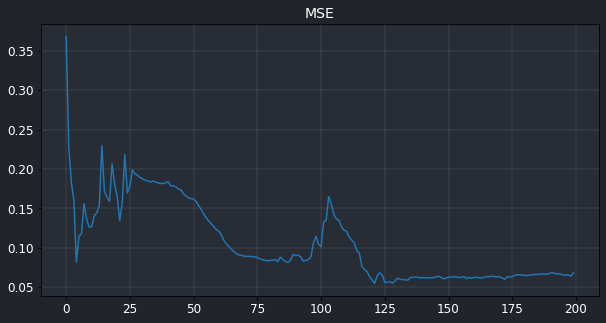

In [57]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.title('MSE', size=14, color='white')
plt.grid(visible=True, linewidth=0.1, color='white')

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.plot(errores)

plt.xticks(color='white', size=12)
plt.yticks(color='white', size=12)

plt.show()

#### **Testeo de la red**

In [58]:
data_test = (np.random.rand(1000, 2) * 2) - 1
y_test = train_network(data_test, 0.001, parametros, training=False)

In [59]:
y_test = np.where(y_test>=0.5, 1, 0)

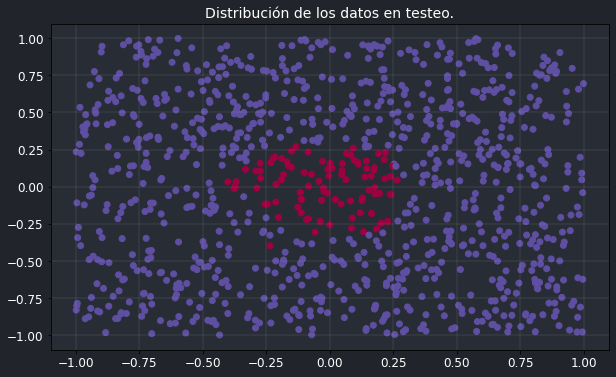

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.title('Distribución de los datos en testeo.', size=14, color='white')
plt.grid(visible=True, linewidth=0.1, color='white')

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.scatter(data_test[:,0], data_test[:,1], c=y_test[:,0], cmap=plt.cm.Spectral)

plt.xticks(color='white', size=12)
plt.yticks(color='white', size=12)

plt.show()